# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

# ANSWERS BELOW: 

- I intend to use linear regression model as this data is all tabular and we are trying to predict a price value which can vary by magnitudes. The problem is not classification because that required binary yes/no style predictions. Classification could be used to predict if a house will be greater than or less than a given threshold, but I believe regression to be more logical and fitting for the task. Clustering could be used to attempt to group together similarly priced/stat houses and visualization could certainly be useful when it comes to understanding the data.
- I expect the model to perform average or even below average upon first fitting and predicting. The fine-tuning process is where I expect to make most of my gains as machine learning and data science as a whole is about small incremental improvements. We can benefit from this model by understanding that it is just a model and that the price and value of a home can and often does have external factors that impact its magnitude.
- I intend to evaluate the model performance using the RMSE, MAE, and Cross-Validation.
- We should collect as much data as is physically possible, it is much easier to choose when to not use data than it is to find new data.
- Though I am not sure just yet, I expect that I will end up using an XGBoost model that utilizes Gradient Descent to minimize a loss function and tune the parameters such that the model is always chasing the "steepest" descent towards improved predictions.
- I expect a reasonably significant amount of effort here, it is often said you learn by doing so I am hoping that applies here.
- I plan to eventually have a vector of predictions, I will verify this using all methods available to me including Cross-Validation and the above mentioned performance evaluators as well as my own eyes to see the performance on a house by house basis.

In [11]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadTrainData():
  # The column names are adopted from the dataset page on Kaggle
  data = pd.read_csv('Files/train.csv')
  return data

def loadTestData():
    data = pd.read_csv('Files/test.csv')
    return data

In [4]:
housing= loadTrainData()

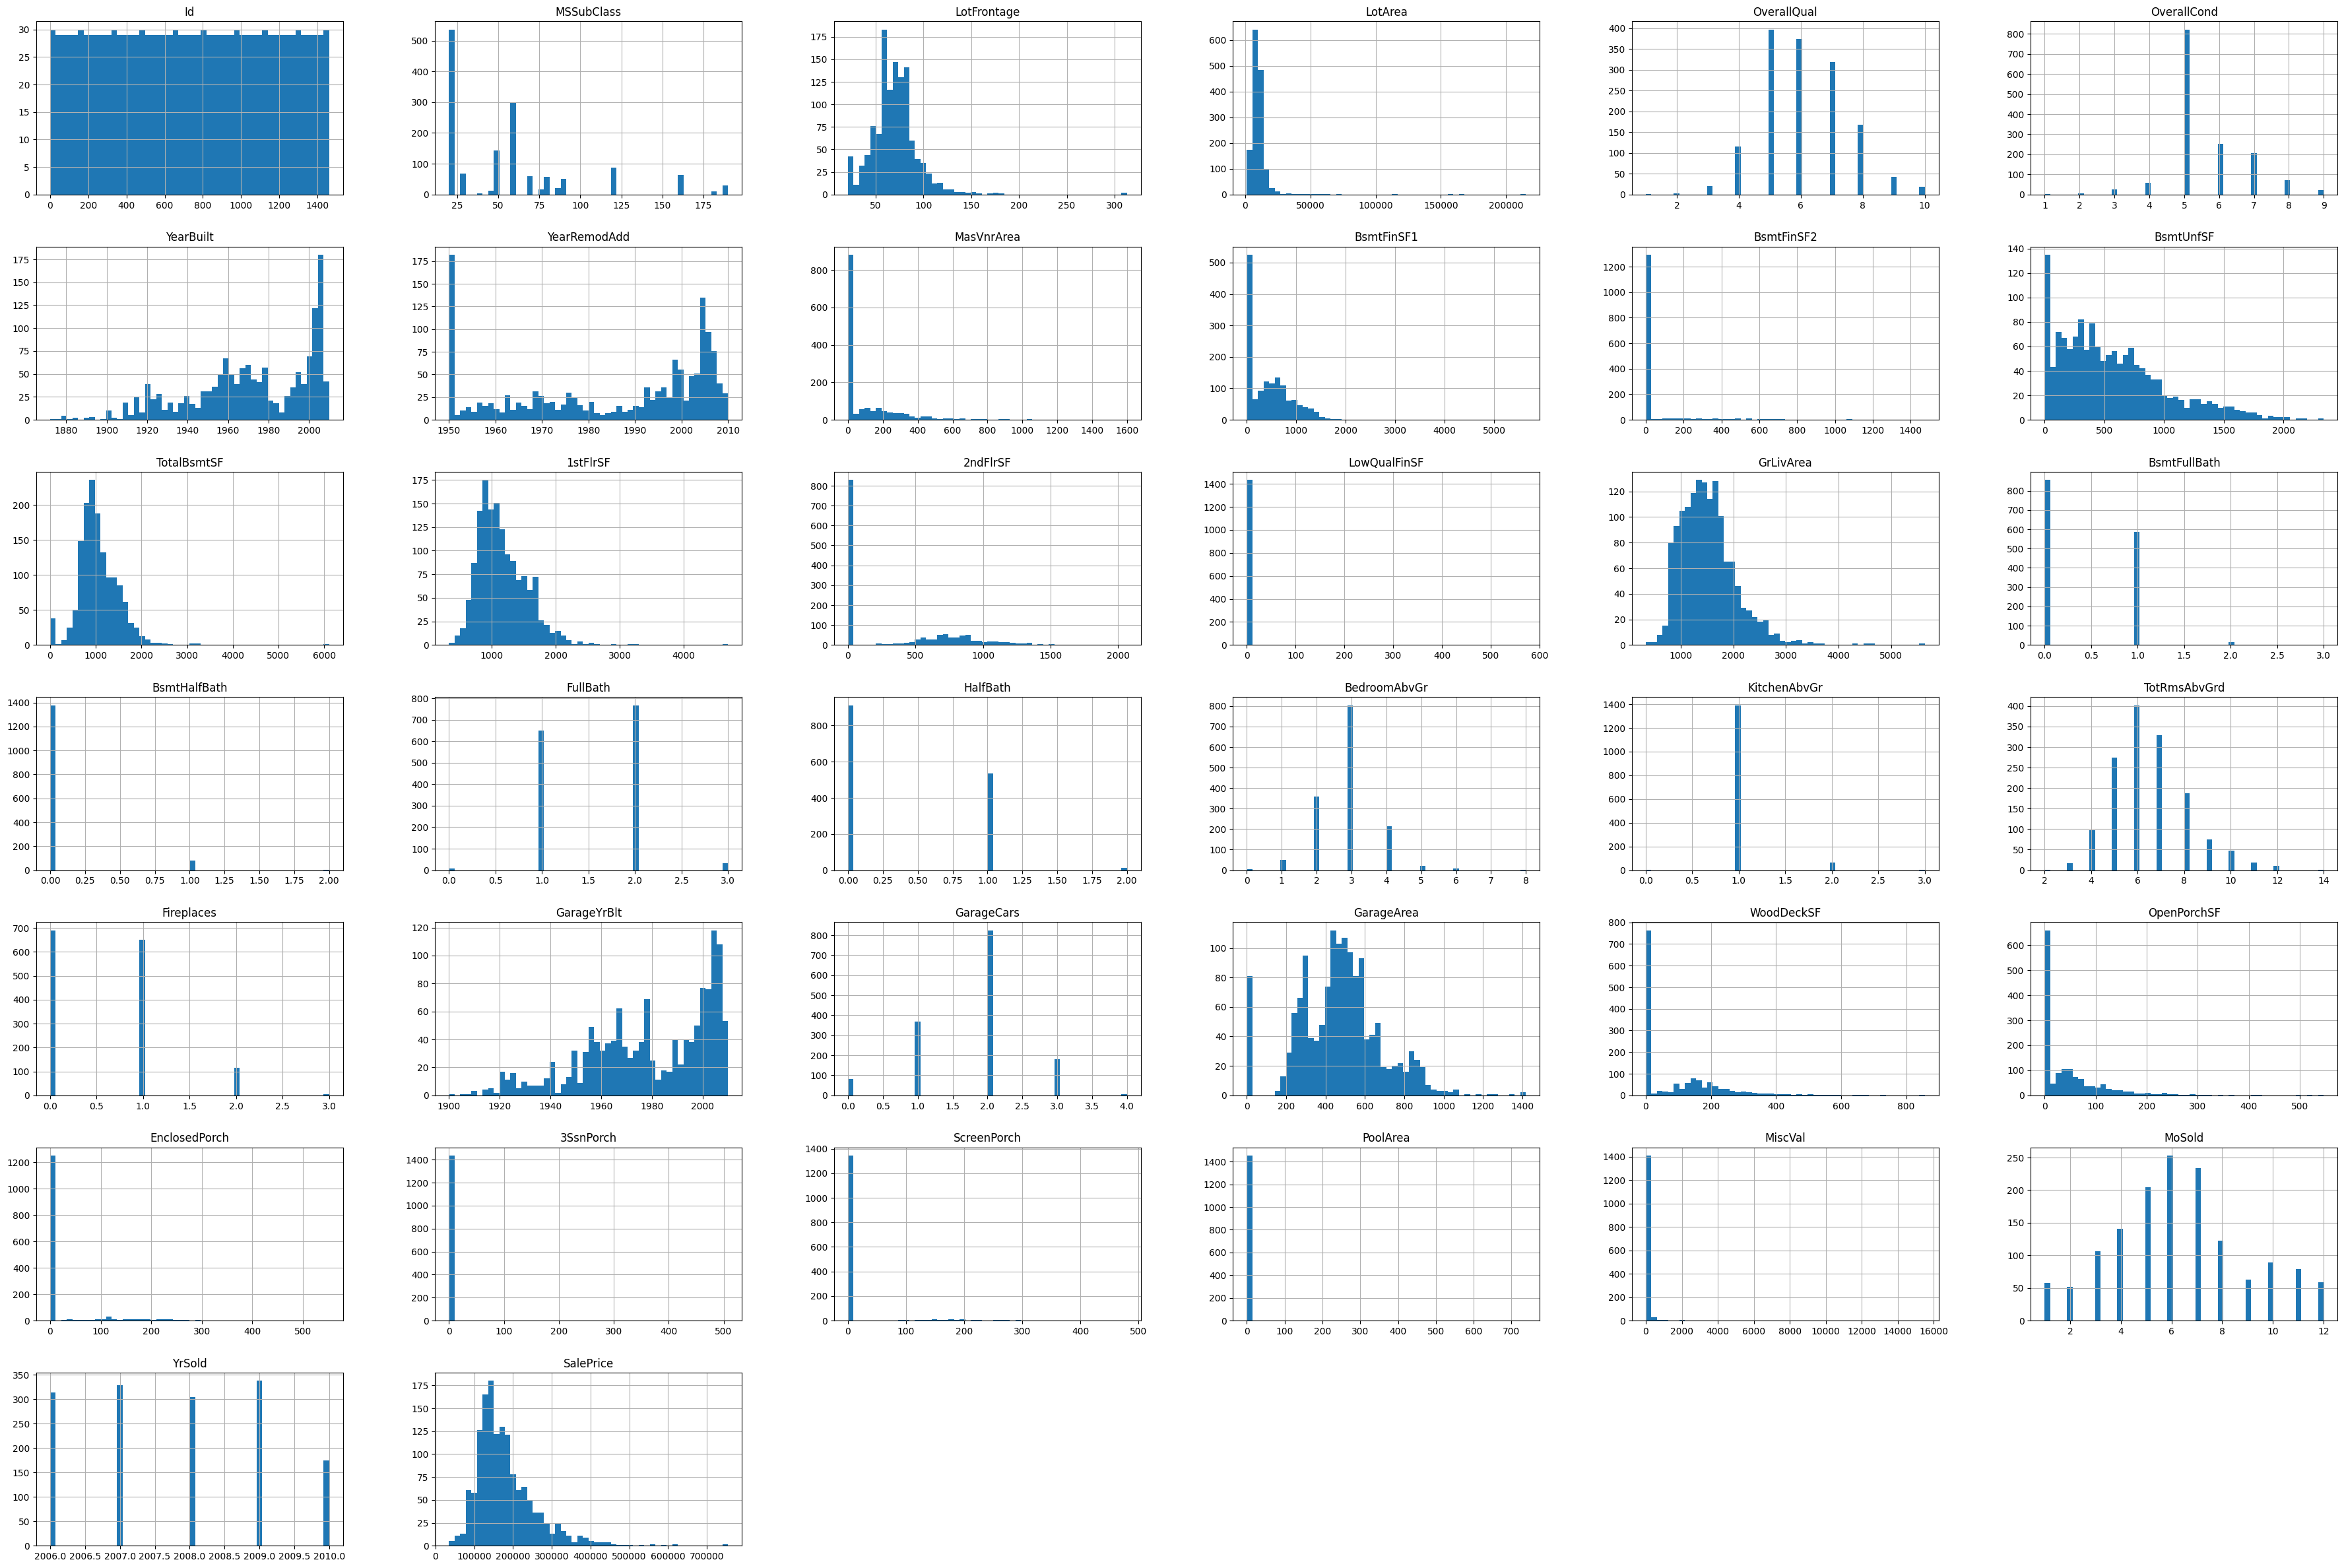

In [5]:
housing.hist(bins=50, figsize=(45,30))
plt.show()

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [1]:
from pandas.plotting import scatter_matrix

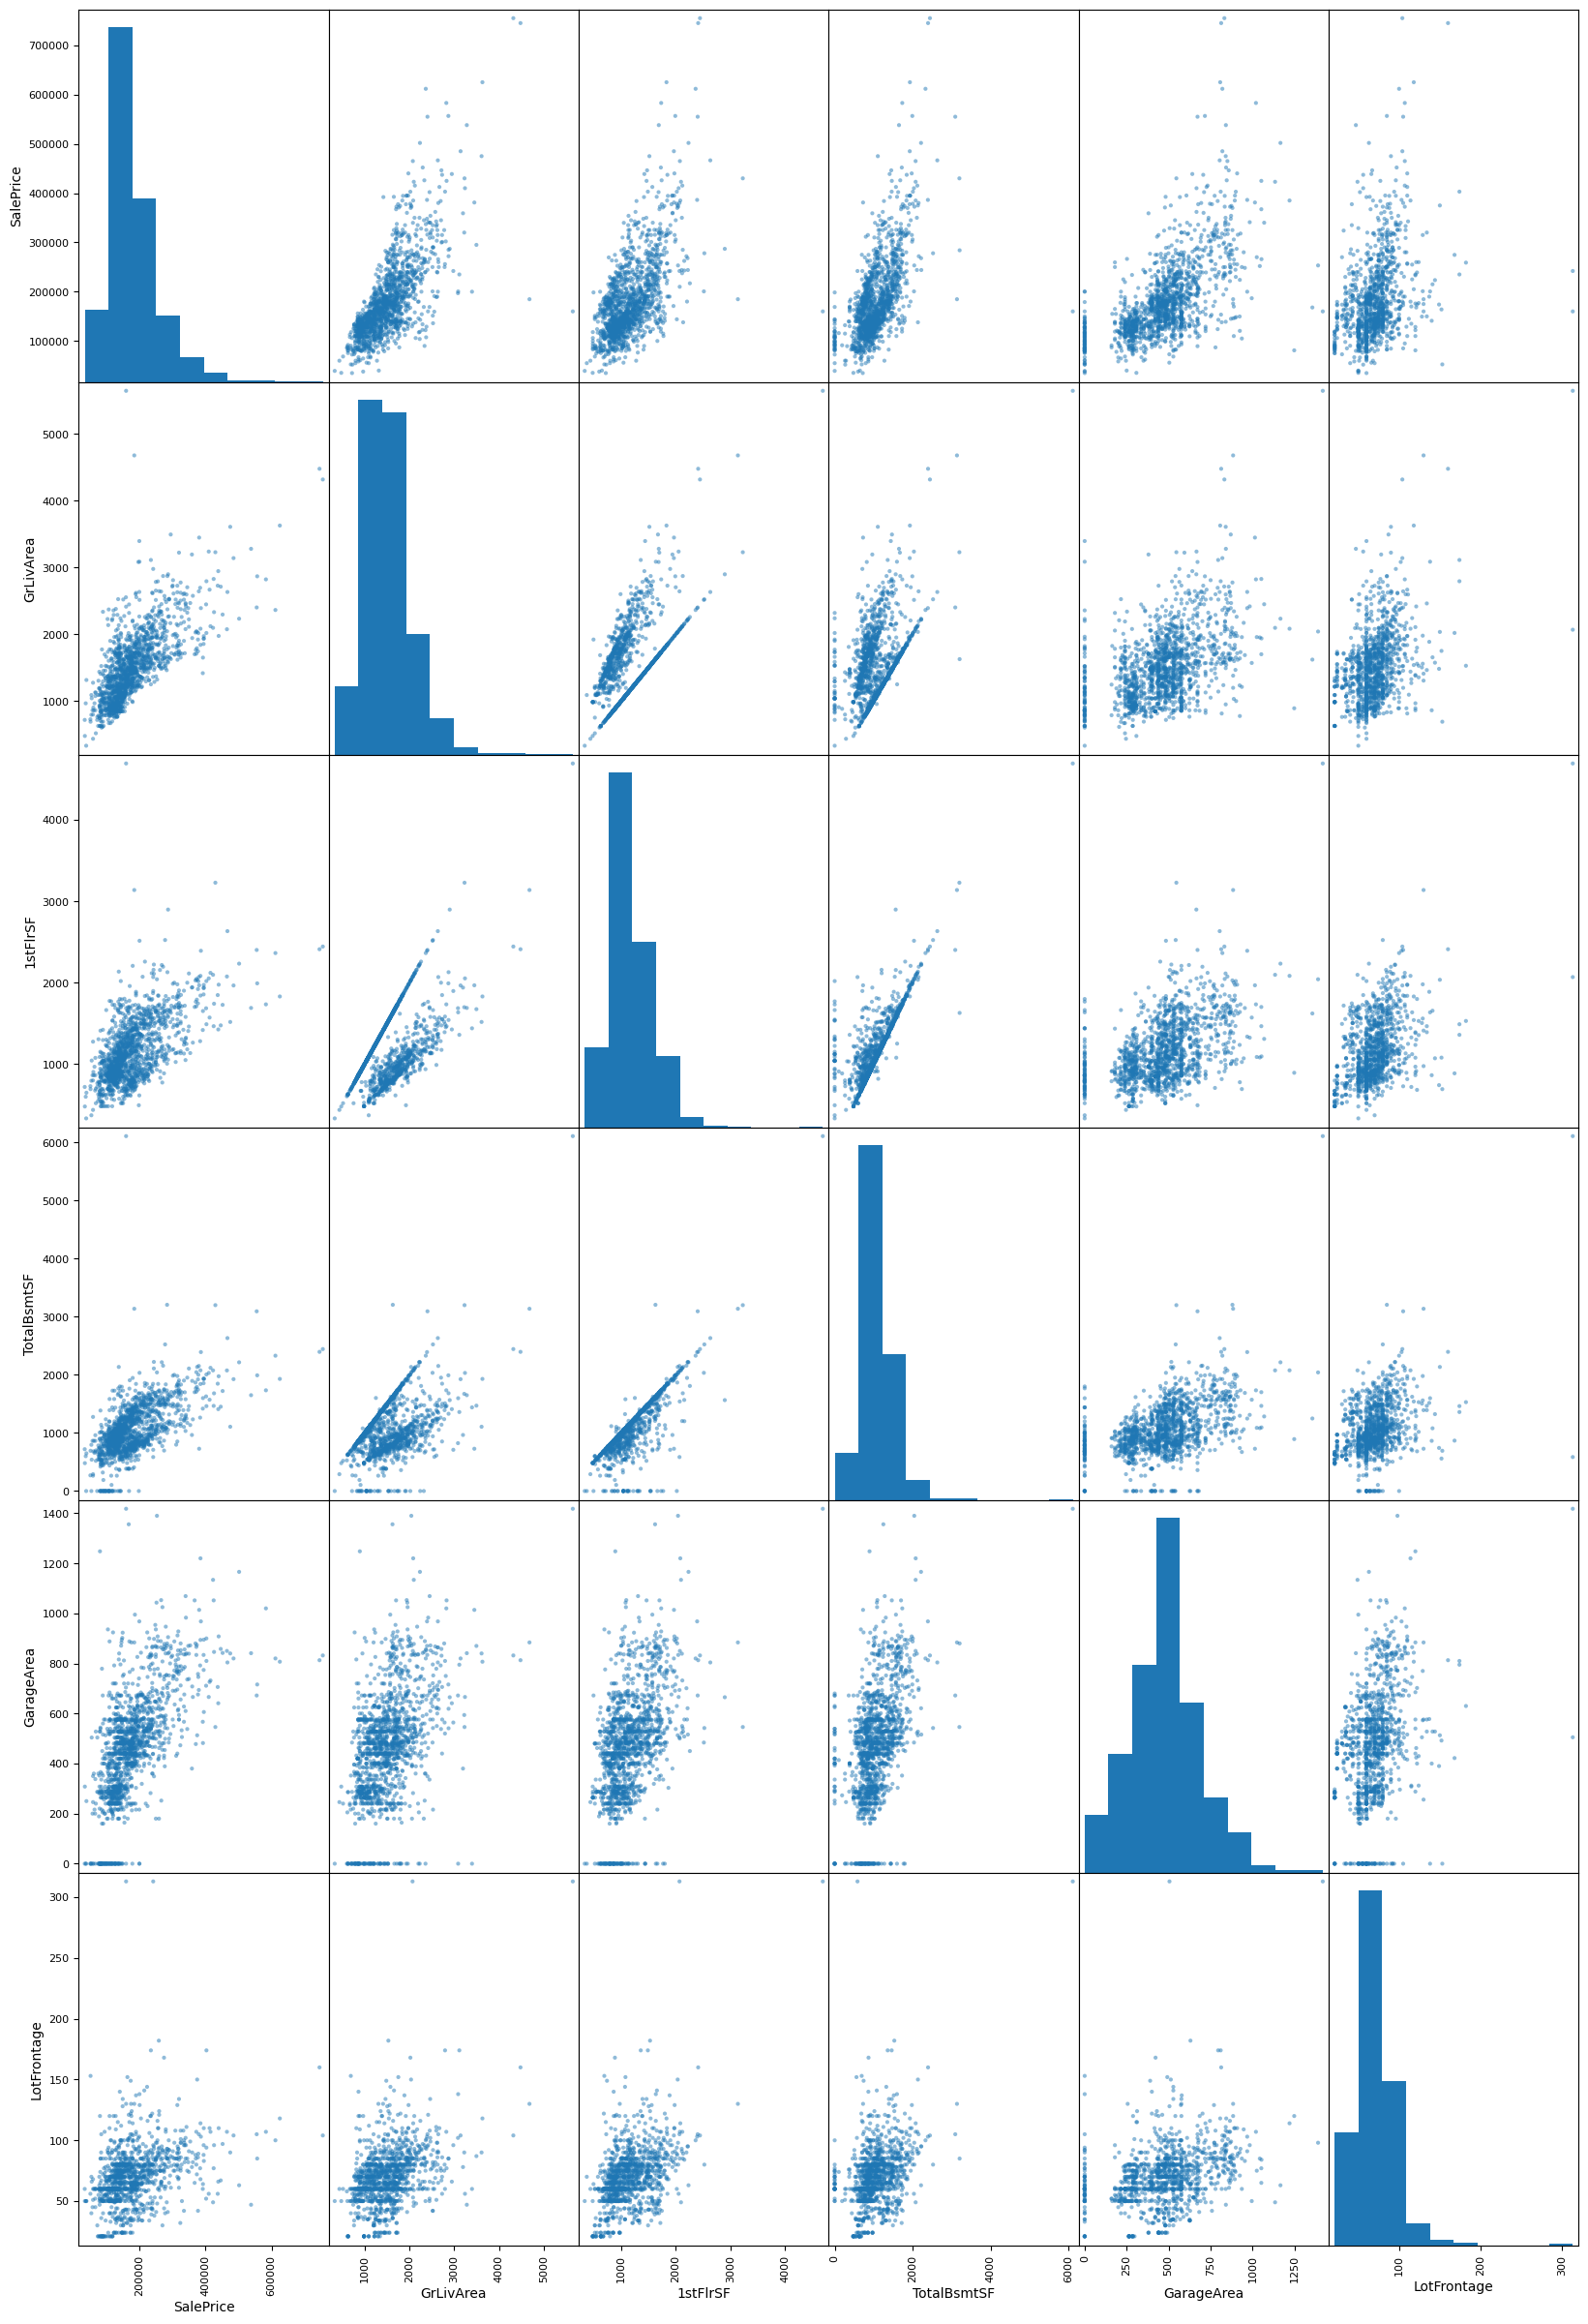

In [9]:
possible_correlators = ['SalePrice', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'LotFrontage']

scatter_matrix(housing[possible_correlators], figsize=(20,30))
plt.show()

In [12]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [16]:
housing.select_dtypes(include=['object']).head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [62]:
housing.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [64]:
#These columns were filtered out based on having too few values are too many of one value, > 1200 of a single value out of ~1500 houses makes it more or less useless
cols_to_drop = ['Utilities', 'Alley', 'LandContour', 'LandSlope'
                , 'Condition2', 'RoofMatl', 'MasVnrType'
                , 'BsmtCond', 'BsmtFinType2', 'Heating'
                , 'CentralAir', 'Electrical', 'Functional'
                , 'GarageQual', 'GarageCond', 'PavedDrive'
                , 'PoolQC', 'Fence', 'MiscFeature']

In [65]:
housing_cut = housing.drop(columns=cols_to_drop)

In [66]:
housing_cut.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LotConfig  \
0   1          60       RL         65.0     8450   Pave      Reg    Inside   
1   2          20       RL         80.0     9600   Pave      Reg       FR2   
2   3          60       RL         68.0    11250   Pave      IR1    Inside   
3   4          70       RL         60.0     9550   Pave      IR1    Corner   
4   5          60       RL         84.0    14260   Pave      IR1       FR2   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
0      CollgCr       Norm     1Fam     2Story            7            5   
1      Veenker      Feedr     1Fam     1Story            6            8   
2      CollgCr       Norm     1Fam     2Story            7            5   
3      Crawfor       Norm     1Fam     2Story            7            5   
4      NoRidge       Norm     1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  MasVnrArea  \
0       2003          2003     Gable     VinylSd     VinylSd       196.0   
1       1976          1976     Gable     MetalSd     MetalSd         0.0   
2       2001          2002     Gable     VinylSd     VinylSd       162.0   
3       1915          1970     Gable     Wd Sdng     Wd Shng         0.0   
4       2000          2000     Gable     VinylSd     VinylSd       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd           No          GLQ   
1        TA        TA     CBlock       Gd           Gd          ALQ   
2        Gd        TA      PConc       Gd           Mn          GLQ   
3        TA        TA     BrkTil       TA           No          ALQ   
4        Gd        TA      PConc       Gd           Av          GLQ   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  \
0         706           0        150          856        Ex       856   
1         978           0        284         1262        Ex      1262   
2         486           0        434          920        Ex       920   
3         216           0        540          756        Gd       961   
4         655           0        490         1145        Ex      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0         1             3             1          Gd             8           0   
1         0             3             1          TA             6           1   
2         1             3             1          Gd             6           1   
3         0             3             1          Gd             7           1   
4         1             4             1          Gd             9           1   

  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0         NaN     Attchd       2003.0          RFn           2         548   
1          TA     Attchd       1976.0          RFn           2         460   
2          TA     Attchd       2001.0          RFn           2         608   
3          Gd     Detchd       1998.0          Unf           3         642   
4          TA     Attchd       2000.0          RFn           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0      

In [ ]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which weâ€™ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [ ]:
# Try a few models here



## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!